In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carrega os dados do arquivo Excel e filtra para deixar apenas as 243 features
dataset = pd.read_excel('Input_Total.xlsx')
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]
dataset = dataset.filter(regex=r'^(?!.*Keq)')
dataset = dataset.drop('Classe', axis=1)
dataset = dataset.drop('Átomos', axis=1)
print(dataset.columns)





In [ ]:

X = dataset
dataset2 = pd.read_excel('Input_Total.xlsx')
y = dataset2['Classe']
print(y)

0      multiphase
1      multiphase
2      multiphase
3      multiphase
4      multiphase
          ...    
123      fluorite
124      fluorite
125      fluorite
126      fluorite
127    perovskite
Name: Classe, Length: 128, dtype: object


In [ ]:
print(X)
print(y)

In [ ]:
# Divide o conjunto de dados em X e y


scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

#Divide os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)





In [ ]:
#X_train.reset_index(drop=True, inplace=True)

y_test = np.array(y_test)
y_train = np.array(y_train)

print(y_test)
print(y_train)


['fluorite' 'fluorite' 'fluorite' 'spinel' 'spinel' 'fluorite' 'rocksalt'
 'perovskite' 'fluorite' 'pyrochlore' 'fluorite' 'pyrochlore' 'fluorite'
 'multiphase' 'spinel' 'rocksalt' 'fluorite' 'spinel' 'fluorite'
 'fluorite' 'fluorite' 'pyrochlore' 'multiphase' 'pyrochlore' 'perovskite'
 'spinel' 'spinel' 'spinel' 'fluorite' 'multiphase' 'spinel' 'spinel'
 'fluorite' 'perovskite' 'spinel' 'rocksalt' 'perovskite' 'spinel'
 'spinel']
['fluorite' 'fluorite' 'spinel' 'spinel' 'spinel' 'spinel' 'multiphase'
 'monoclinic' 'fluorite' 'spinel' 'pyrochlore' 'multiphase' 'spinel'
 'spinel' 'monoclinic' 'multiphase' 'multiphase' 'multiphase' 'fluorite'
 'fluorite' 'spinel' 'fluorite' 'spinel' 'multiphase' 'fluorite'
 'perovskite' 'monoclinic' 'fluorite' 'spinel' 'monoclinic' 'monoclinic'
 'monoclinic' 'spinel' 'fluorite' 'multiphase' 'fluorite' 'fluorite'
 'perovskite' 'multiphase' 'multiphase' 'spinel' 'ortho perovskite'
 'multiphase' 'multiphase' 'multiphase' 'multiphase' 'spinel' 'fluorite'
 'f

In [ ]:
import pickle
#Remember the time GB

if 1<2 :
  with open('X_trainGB.pickle', 'wb') as f:
    pickle.dump(X_train, f)

  with open('X_testGB.pickle', 'wb') as f:
    pickle.dump(X_test, f)

  with open('y_trainGB.pickle', 'wb') as f:
    pickle.dump(y_train, f)

  with open('y_testGB.pickle', 'wb') as f:
    pickle.dump(y_test, f)

  with open('X_GB.pickle', 'wb') as f:
    pickle.dump(X, f)

  with open('y_GB.pickle', 'wb') as f:
    pickle.dump(y, f)

  with open('scalerGB.pickle', 'wb') as f:
    pickle.dump(scaler, f)


In [ ]:
#Implementar gradient Booting
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

param_grid = {

        'loss' : ['log_loss'],
        'criterion' : ['friedman_mse', 'squared_error'],
        'max_features' : ['sqrt', 'log2'],
        'max_leaf_nodes' : [7, 9,12,14],
        'n_estimators' : [50,100,200,500],
        'max_depth' : [3,5,7]

  }

modelGB = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator = modelGB, param_grid = param_grid,
                            cv = 2, n_jobs = -1, verbose = 2)



grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

#{'criterion': 'friedman_mse', 'loss': 'log_loss', 'max_depth': 7,
#'max_features': 'sqrt', 'max_leaf_nodes': 7, 'n_estimators': 100}

Fitting 2 folds for each of 192 candidates, totalling 384 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


{'criterion': 'friedman_mse', 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 12, 'n_estimators': 50}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB = GradientBoostingClassifier(
    criterion='friedman_mse', loss= 'log_loss', max_depth= 3,
    max_features= 'sqrt', max_leaf_nodes= 12, n_estimators= 50

)



modelGB.fit(X_train, y_train)






In [ ]:
y_pred = modelGB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(accuracy)


[[12  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  1]
 [ 1  1  0  0  2  0  0]
 [ 0  1  0  0  0  1  1]
 [ 0  1  0  0  0  0 11]]
0.6923076923076923


In [ ]:
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Lista de nomes de arquivos para carregar
files_to_load = [
    'X_trainGB.pickle',
    'X_testGB.pickle',
    'y_trainGB.pickle',
    'y_testGB.pickle',
    'X_GB.pickle',
    'y_GB.pickle',
    'scalerGB.pickle',
    'modeloGB.pkl'
]

# Dicionário para armazenar os dados carregados, chave é o nome da variável
loaded_data = {}

# Loop para carregar cada arquivo em uma variável correspondente
for filename in files_to_load:
    with open(filename, 'rb') as f: # 'rb' para ler no modo binário
        loaded_data[filename.replace('.pickle', '')] = pickle.load(f)

# Acesso aos dados carregados, por exemplo:
X_train = loaded_data['X_trainGB']
X_test = loaded_data['X_testGB']
y_train = loaded_data['y_trainGB']
y_test = loaded_data['y_testGB']
X = loaded_data['X_GB']
y = loaded_data['y_GB']
scaler = loaded_data['scalerGB']
model = loaded_data['modeloGB.pkl']

# Agora as variáveis X_train, X_test, y_train, y_test, X, y, scaler contêm os dados carregados


x = accuracy_score(y_test, model.predict(X_test), sample_weight=None)
print(float(x))

0.6923076923076923


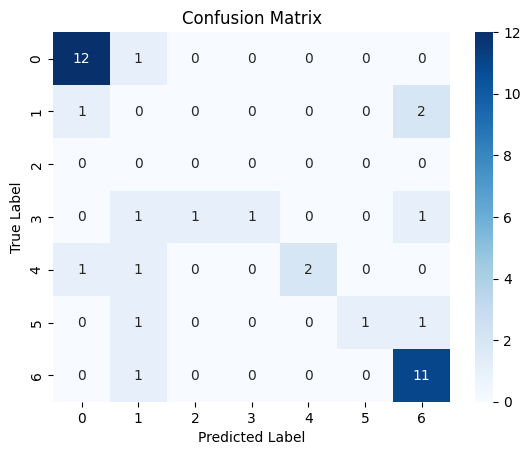

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'model' é o seu modelo treinado e 'X_test', 'y_test' são seus dados de teste
# Primeiro, você precisa fazer previsões usando o seu conjunto de teste
y_pred = model.predict(X_test)

# Gere a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Para melhor visualização, você pode usar o Seaborn para plotar a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

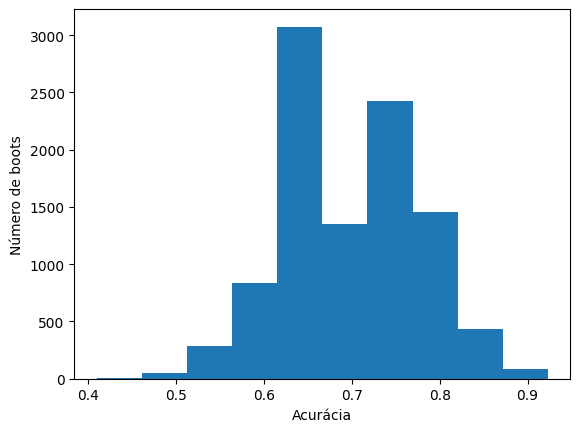

Intervalo de confiança : [0.5384615384615384,0.8205128205128205]
Acurácia 'real' do modelo performada no teste : 0.6923076923076923


In [ ]:
import random
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


def new_boot(X_test, y_test):

  novo_X = X_test.copy()
  novo_Y = y_test.copy()

  c= 0
  while c < len(X_test):
    rand = random.randint(0,len(X_test)-1)



    novo_X[c] = X_test[rand].copy()
    novo_Y[c] = y_test[rand]

    c= c+1


  return novo_X , novo_Y

# Pega a acurácia de um boot
# Ajuste em pegar a mérica sem ser pelo report
def pegar_acuracia_do_relatorio(novo_X , novo_Y):

  return accuracy_score(novo_Y, modelGB.predict(novo_X), sample_weight=None)


# calcula a distribuição dos boots

numero_boots = 10001
lista_boots = []
contador = 0

while contador < numero_boots:
  x, y = new_boot(X_test, y_test)
  lista_boots.append(pegar_acuracia_do_relatorio(x, y))
  contador =contador +1

plt.hist(lista_boots)
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show()

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")
print("Acurácia 'real' do modelo performada no teste : "+ str(accuracy_score(y_test, modelGB.predict(X_test), sample_weight=None)))

In [ ]:
#################################################
#Salvar modelo treinado
import pickle



with open('modeloGB.pkl', 'wb') as file:
    pickle.dump(modelGB, file)



# print(accuracy_score(y_test, model.predict(X_test), sample_weight=None))

In [1]:
!pip install shap==0.44.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.5 MB/s eta 0:00:00


  0%|          | 0/39 [00:00<?, ?it/s]

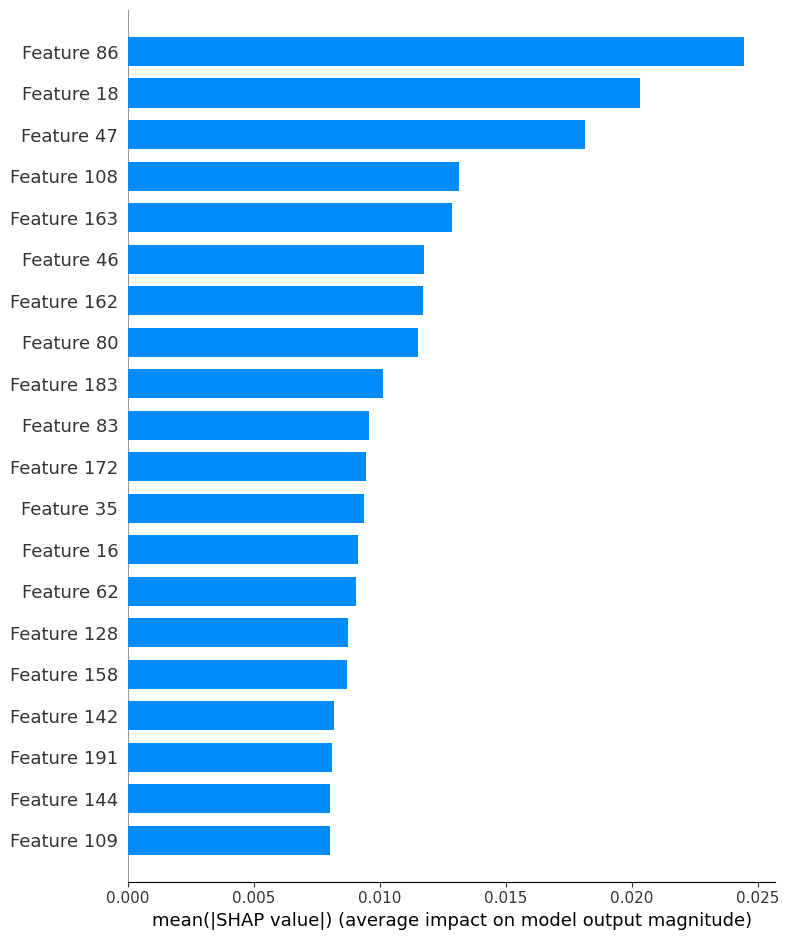

In [2]:
#SHAP
#!pip install shap
import shap
import pickle

# Carregar o modelo do arquivo
with open('modeloGB.pkl', 'rb') as file:
    model = pickle.load(file)

with open('X_trainGB.pickle', 'rb') as file:
    X_train = pickle.load(file)

with open('X_testGB.pickle', 'rb') as file:
    X_test = pickle.load(file)


# Usar KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, X_train)

# Calcular SHAP values para o conjunto de teste
shap_values = explainer.shap_values(X_test)

# Visualizar a importância das features para a primeira classe como exemplo
shap.summary_plot(shap_values[0], X_test, plot_type="bar")

In [3]:
import numpy as np

important_features_index = np.argsort(-np.abs(np.array(shap_values).mean(0)).mean(0))[:10]

# Selecionar os dados apenas com as features importantes
X_train_selected = X_train[:, important_features_index]
X_test_selected = X_test[:, important_features_index]

In [9]:
import pandas as pd


dataset = pd.read_excel('Input_Total.xlsx')
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]
dataset = dataset.filter(regex=r'^(?!.*Keq)')
dataset = dataset.drop('Classe', axis=1)
dataset = dataset.drop('Átomos', axis=1)


nomes_das_colunas = dataset.columns[important_features_index]

print("Nomes das colunas correspondentes:", nomes_das_colunas.tolist())

lista_classes = model.classes_
print(lista_classes)

Nomes das colunas correspondentes: ['melting_point_desvio', 'atomic_enc_maximo', 'atomic_spacegroupnum_maximo', 'covalent_rad_desvio', 'covalent_rad_emp_media', 'coordenacao_media', 'coeff_of_lte_maximo', 'atomic_hfu_media', 'atomic_hatm_desvio', 'density_of_solid_media']
['fluorite' 'monoclinic' 'multiphase' 'ortho perovskite' 'perovskite'
 'pyrochlore' 'rocksalt' 'spinel']


In [14]:
#Implementar gradient Booting
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

with open('y_trainGB.pickle', 'rb') as file:
    y_train = pickle.load(file)


param_grid = {

        'loss' : ['log_loss'],
        'criterion' : ['friedman_mse', 'squared_error'],
        'max_features' : ['sqrt', 'log2'],
        'max_leaf_nodes' : [7, 9,12,14],
        'n_estimators' : [50,100,200,500],
        'max_depth' : [3,5,7]

  }

modelGB = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator = modelGB, param_grid = param_grid,
                            cv = 2, n_jobs = -1, verbose = 2)



grid_search.fit(X_train_selected, y_train)
print(grid_search.best_params_)

Fitting 2 folds for each of 192 candidates, totalling 384 fits


The least populated class in y has only 1 members, which is less than n_splits=2.


{'criterion': 'friedman_mse', 'loss': 'log_loss', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': 14, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB = GradientBoostingClassifier(
    criterion='friedman_mse', loss= 'log_loss', max_depth= 7,
    max_features= 'sqrt', max_leaf_nodes= 14, n_estimators= 100

)


modelGB.fit(X_train_selected, y_train)


In [34]:
with open('y_testGB.pickle', 'rb') as file:
    y_test = pickle.load(file)

y_pred = modelGB.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

with open('modeloGB_66.pickle', 'wb') as f:
  pickle.dump(modelGB, f)

0.6666666666666666


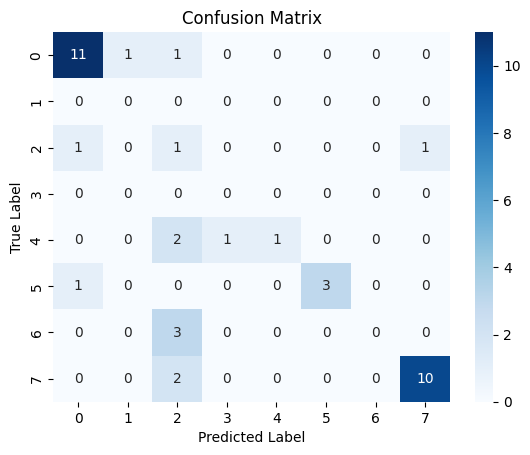

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'model' é o seu modelo treinado e 'X_test', 'y_test' são seus dados de teste
# Primeiro, você precisa fazer previsões usando o seu conjunto de teste
y_pred = modelGB.predict(X_test_selected)

# Gere a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Para melhor visualização, você pode usar o Seaborn para plotar a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [36]:
X_test = X_test_selected.copy()

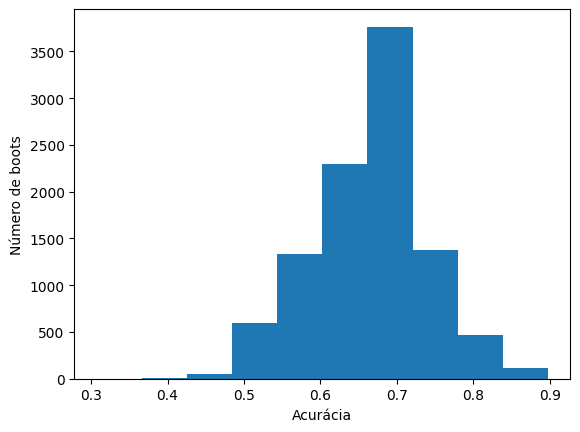

Intervalo de confiança : [0.5128205128205128,0.8205128205128205]
Acurácia 'real' do modelo performada no teste : 0.6666666666666666


In [39]:
import random
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


def new_boot(X_test, y_test):

  novo_X = X_test.copy()
  novo_Y = y_test.copy()

  c= 0
  while c < len(X_test):
    rand = random.randint(0,len(X_test)-1)



    novo_X[c] = X_test[rand].copy()
    novo_Y[c] = y_test[rand]

    c= c+1


  return novo_X , novo_Y

# Pega a acurácia de um boot
# Ajuste em pegar a mérica sem ser pelo report
def pegar_acuracia_do_relatorio(novo_X , novo_Y):

  return accuracy_score(novo_Y, modelGB.predict(novo_X), sample_weight=None)


# calcula a distribuição dos boots

numero_boots = 10001
lista_boots = []
contador = 0

while contador < numero_boots:
  x, y = new_boot(X_test, y_test)
  lista_boots.append(pegar_acuracia_do_relatorio(x, y))
  contador =contador +1

plt.hist(lista_boots)
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show()

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")
print("Acurácia 'real' do modelo performada no teste : "+ str(accuracy_score(y_test, modelGB.predict(X_test), sample_weight=None)))

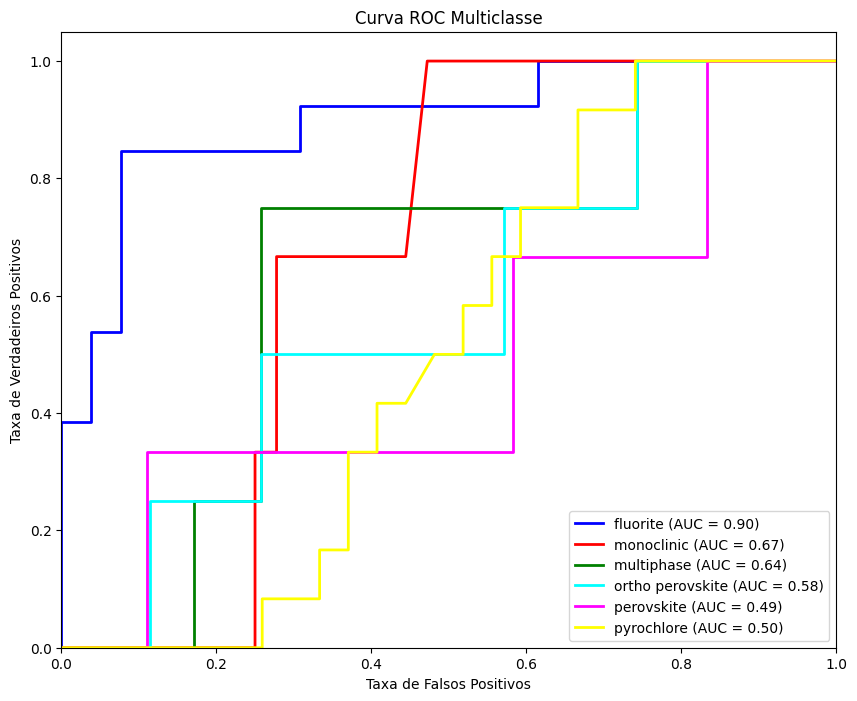

In [40]:
#Rock

import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Supondo que y_test já esteja disponível e não seja binário
# Se y_test já for binário (em formato one-hot), você pode pular esta etapa
# Binarizar os rótulos em uma configuração um contra todos
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

class_labels = ['fluorite', 'monoclinic', 'multiphase','ortho perovskite', 'perovskite', 'pyrochlore', 'roxksalt', 'spinel']

# Prever probabilidades. Certifique-se de que seu modelo tem um método `predict_proba`
y_score = modelGB.predict_proba(X_test_selected)

# Computar ROC curve e ROC area para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot da curva ROC para cada classe
colors = cycle(['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightblue', 'gray', 'orange', 'purple'])
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
              label='{0} (AUC = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

#plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()

In [42]:
#SHAP
#!pip install shap
import shap
import pickle
X_train = X_train_selected.copy()


# Usar KernelExplainer
explainer = shap.KernelExplainer(modelGB.predict_proba, X_train)

# Calcular SHAP values para o conjunto de teste
shap_values = explainer.shap_values(X_test)

  0%|          | 0/39 [00:00<?, ?it/s]

In [43]:
with open('X_train_selected.pickle', 'wb') as f:
  pickle.dump(X_train_selected, f)

with open('X_test_selected.pickle', 'wb') as f:
  pickle.dump(X_test_selected, f)

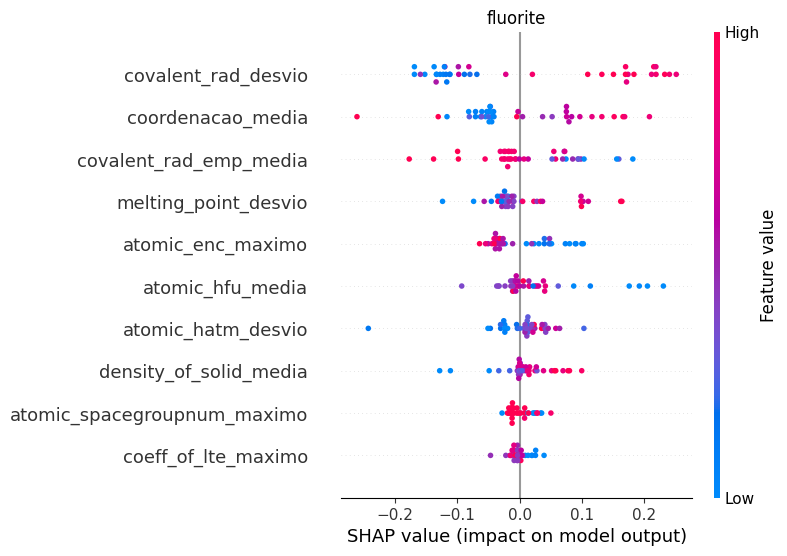

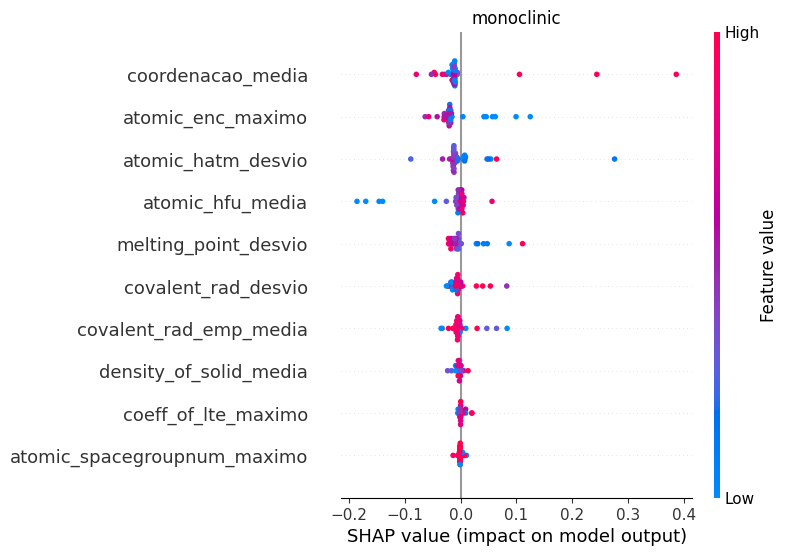

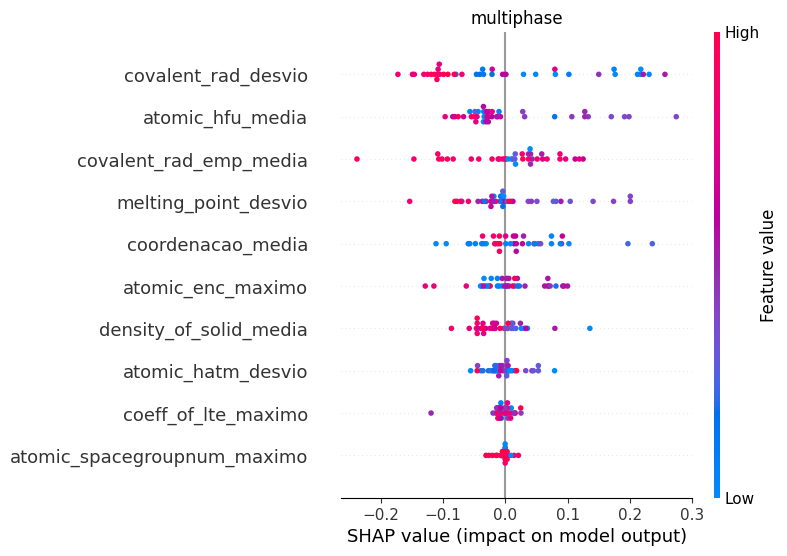

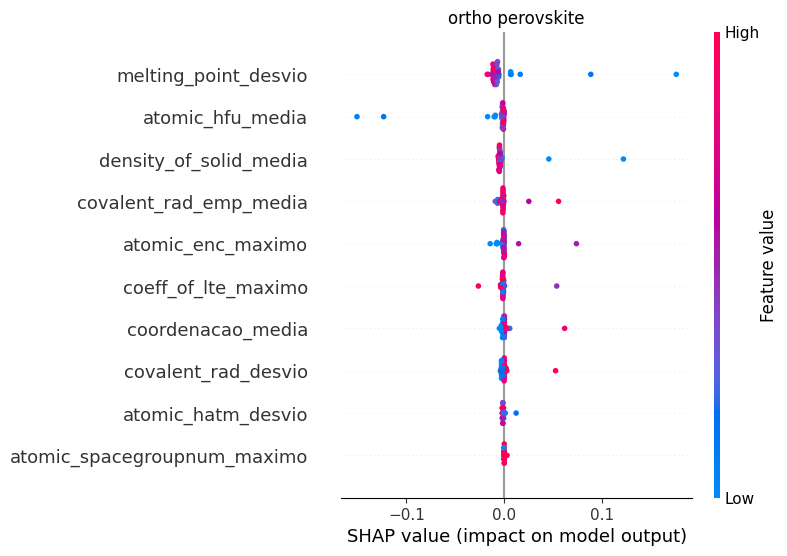

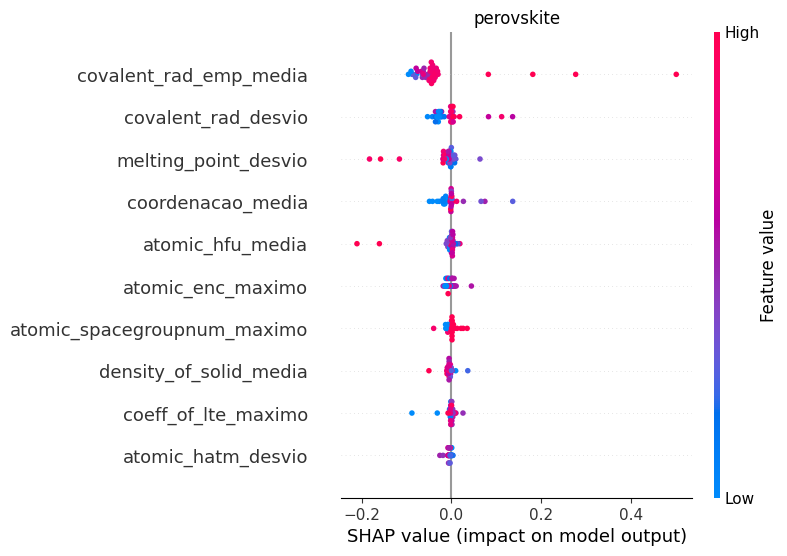

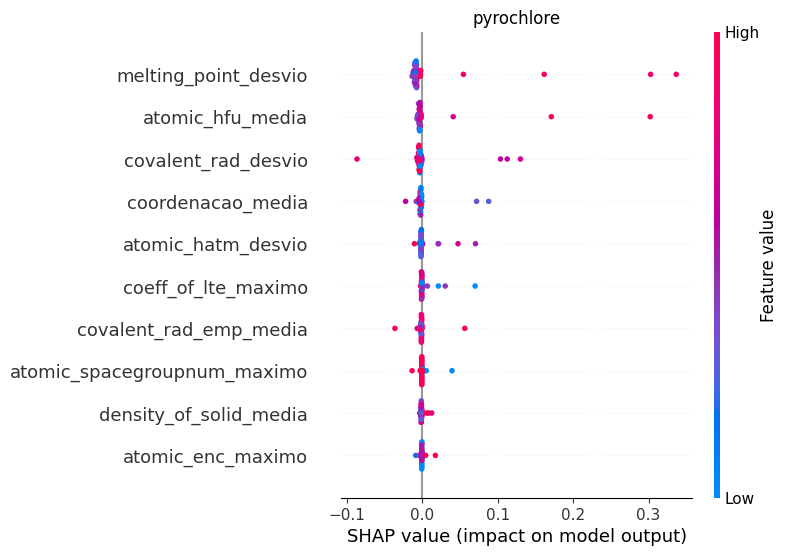

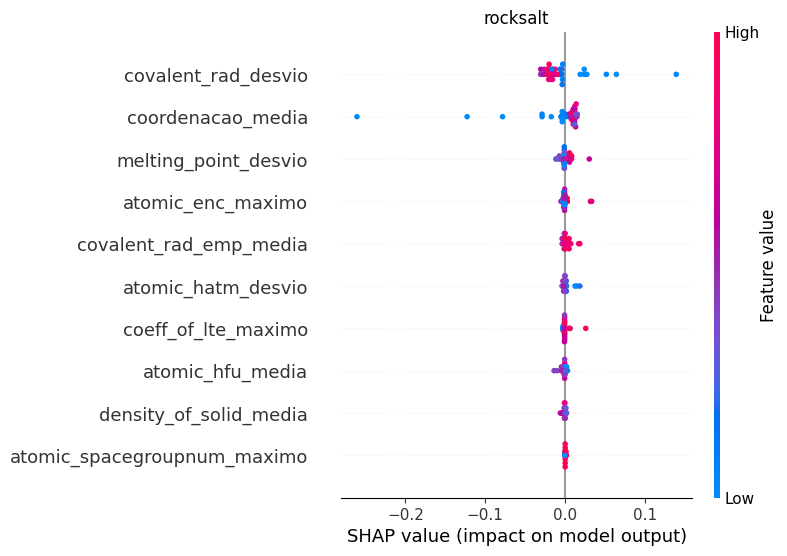

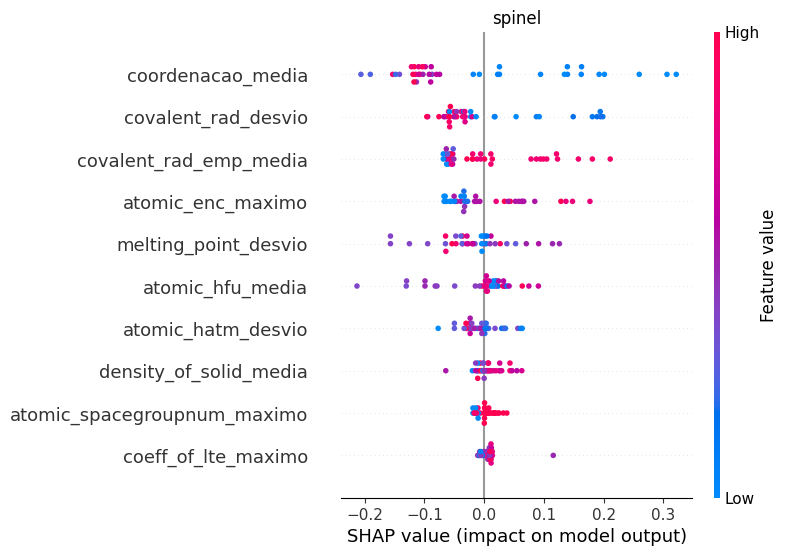

In [44]:
import matplotlib.pyplot as plt

feature_names  = nomes_das_colunas.tolist()

lista_classes = model.classes_


# Visualizar a importância das features para a primeira classe como exemplo
count = 0
while len (shap_values)>count:

  shap.summary_plot(shap_values[count], X_test, plot_type="dot", feature_names = feature_names, show = False)
  plt.title(lista_classes[count])
  plt.show()

  count = count +1